In [2]:
from core import *
import networkx as nx
import time
import pandas as pd

# Leitura das instâncias 

- Instância toy1 (toy1_instance): grafo valorado com custos positivos e não direcionado. Exemplo de entrada
para ser usada pelos algoritmos de caminho mínimo e árvore geradora mínima.

In [3]:
toy1_instance = {
    "a": {"b": 60, "c": 54, "d": 42},
    "b": {"a": 60, "d": 71, "f": 29},
    "c": {"a": 54, "d": 56, "e": 67},
    "d": {"a": 42, "b": 71, "c": 56, "f": 52, "g": 87, "e": 26},
    "e": {"c": 67, "d": 26, "g": 70, "i": 73},
    "f": {"b": 29, "d": 52, "g": 20, "h": 25},
    "g": {"d": 87, "e": 70, "f": 20, "h": 36, "j": 32, "i": 59},
    "h": {"f": 25, "g": 36, "j": 25},
    "i": {"e": 73, "g": 59, "j": 26},
    "j": {"g": 32, "h": 25, "i": 26},
}

- Instância toy2: grafo de fluxo valorado com custos positivos e direcionado. Exemplo de
entrada para ser usada pelo algoritmo de fluxo (Ford-Fulkerson).

In [179]:
toy2_instance = {
    "1": {"2": 3, "3": 3},
    "2": {"3": 1, "4": 3, "5": 2},
    "3": {"4": 5},
    "4": {"6": 6},
    "5": {"4": 3, "6": 3},
    "6": {}
}

Instâncias de benchmarks disponíveis na literatura: exemplos de entrada para serem aplicadas
aos algoritmos de caminho mínimo e árvore geradora mínima.
Os algoritmos devem ser executados com pelo menos 3 diferentes instâncias do site
http://www.dis.uniroma1.it/challenge9/download.shtml. Neste site existe uma tabela com arquivos
de dados referentes a 12 redes de estradas dos USA.

Sugiro escolher as três menores: New York
(NY), San Francisco (BAY) e Colorado (COL). Existem dois tipos de rede para cada cidade citada
acima: uma delas possui informações de distância (coluna Distance graph da tabela) e a outra,
tempo de viagem (coluna Travel Time graph da tabela). Sugiro aplicar suas implementações apenas
nas redes de distâncias. Informações do formato dos arquivos de dados podem ser encontradas em
http://www.dis.uniroma1.it/challenge9/format.shtml.

In [20]:
ny_path = "USA-road-d.NY.gr.gz"
san_path = "USA-road-d.BAY.gr.gz"
col_path = "USA-road-d.COL.gr.gz"

In [6]:
download_data(
    "http://www.diag.uniroma1.it/challenge9/data/USA-road-d/USA-road-d.NY.gr.gz",
    ny_path,
)

download_data(
    "http://www.diag.uniroma1.it/challenge9/data/USA-road-d/USA-road-d.BAY.gr.gz",
    san_path,
)
download_data(
    "http://www.diag.uniroma1.it//challenge9/data/USA-road-d/USA-road-d.COL.gr.gz",
    col_path,
)

- Instância de entrada para o algoritmo de fluxo: um exemplo de entrada a ser aplicado ao
algoritmo de Ford-Fulkerson
Considerar o exemplo do arquivo no formato DIMACS representando o digrafo de 6 vértices e 8
arcos apresentado em https://lpsolve.sourceforge.net/5.5/DIMACS_maxf.htm.

In [220]:
def read_gr_graph(file_path, func = nx.Graph):
    graph = func()

    with open(file_path, "r") as file:
        for line in file:
            if line.startswith(("c", "p")):
                continue
            if line.startswith("a"):
                _, source, target, weight = line.split()
                graph.add_edge(source, target, weight=float(weight))
    return graph

In [221]:
graph_dimacs_instance = read_gr_graph("data/dimacs.txt", nx.DiGraph)

In [222]:
dimacs_instance = nx.to_dict_of_dicts(graph_dimacs_instance)

In [223]:
dimacs_instance = {
    node1: {node2: subdict["weight"] for node2, subdict in nested_dict.items()}
    for node1, nested_dict in dimacs_instance.items()
}

## Arquivo de resultados

In [5]:
try:
    results = pd.read_csv("data/results.csv")
except Exception as e:
    results = pd.DataFrame(
        columns=[
            "instancia",
            "n",
            "m",
            "algoritmo",
            "custo",
            "tempo",
            "resultado",
            "anteriores",
        ]
    )

# Plot dos gráficos mais simples

## Toy 1

In [10]:
# Create an empty graph
graph_toy1_instance = nx.Graph()

# Add nodes from adjacency list
graph_toy1_instance.add_nodes_from(toy1_instance.keys())

# Add edges from adjacency list
for node, neighbors in toy1_instance.items():
    for neighbor, weight in neighbors.items():
        graph_toy1_instance.add_edge(node, neighbor, weight=weight)

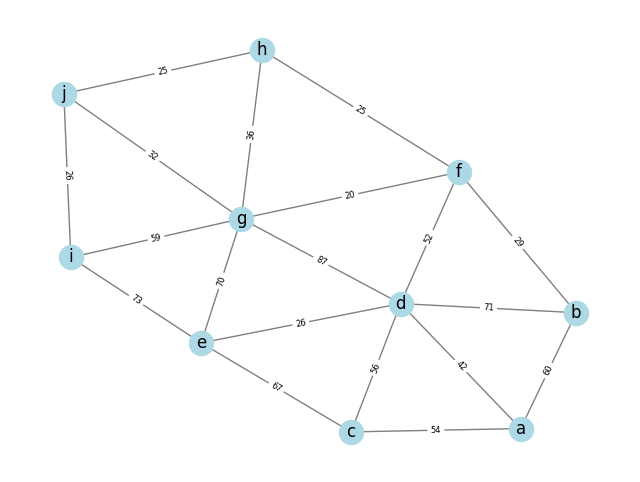

In [7]:
plot_graph(graph_toy1_instance)

## Toy 2

In [180]:
graph_toy2_instance = nx.DiGraph()

# Add nodes from adjacency list
graph_toy2_instance.add_nodes_from(toy2_instance.keys())

# Add edges from adjacency list
for node, neighbors in toy2_instance.items():
    for neighbor, weight in neighbors.items():
        graph_toy2_instance.add_edge(node, neighbor, weight=weight)

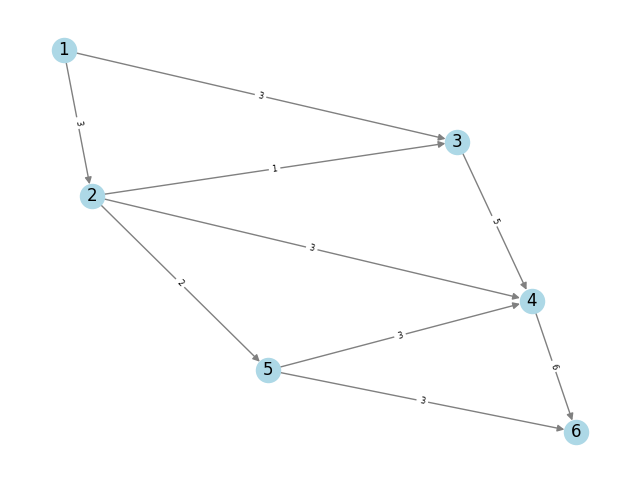

In [181]:
plot_graph(graph_toy2_instance, arrows=True)

## DIMACS

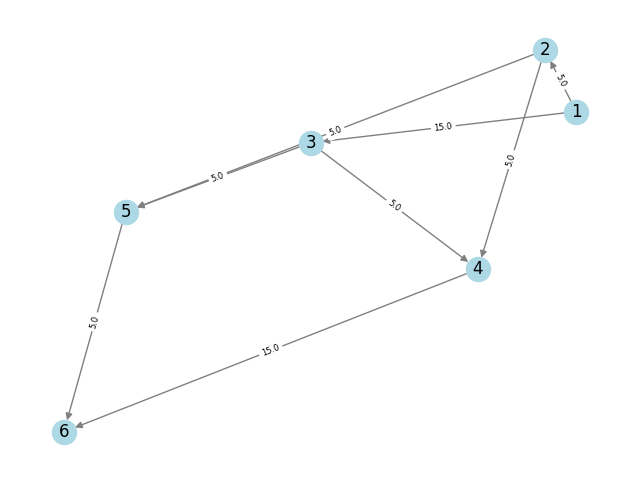

In [225]:
plot_graph(graph_dimacs_instance, arrows=True)

# Djikstra


Pseudocode 

````python

vINI = vértice inicial
d(vINI, vINI) = 0
d(vINI, i) = INFINITO, para todo i, i pertence a V – {vINI}
fechado = vazio
aberto = V
anterior(i) = 0, para todo i, i pertence a V
enquanto(aberto ≠ vazio) {
    k = vértice pertencente a aberto, mais próximo do vértice inicial
    fechado = fechado + k; 
    aberto = aberto – k;
    para cada vizinho i de k que está em aberto faça{
        custo = min{d(vINI, i), d(vINI,k) + c(k,i)}

        se (custo < d(vINI, i)) então
            d(vINI, i) = custo; anterior(i) = k

    }
}

````

## TOY 1

In [8]:
start_node = "a"
start_time = time.time()
distances, previous = dijkstra(toy1_instance, start_node)
end_time = time.time()

In [9]:
print("Time between function executions:", end_time - start_time, "seconds")

Time between function executions: 0.0 seconds


In [12]:
results_list = [
    "toy1",
    graph_toy1_instance.number_of_nodes(),
    graph_toy1_instance.number_of_edges(),
    "Dijkstra",
    sum(distances.values()),
    end_time - start_time,
    distances,
    previous,
]

In [ ]:
results.loc[len(results)] = results_list

In [18]:
results.query("instancia == 'toy1' and algoritmo == 'Dijkstra'").transpose()

,0
instancia,toy1
n,10
m,19
algoritmo,Dijkstra
custo,816.0
tempo,0.000098
resultado,"{'a': 0, 'b': 60, 'c': 54, 'd': 42, 'e': 68, '..."
anteriores,"{'a': None, 'b': 'a', 'c': 'a', 'd': 'a', 'e':..."


## New york

In [22]:
ny_path

'USA-road-d.NY.gr.gz'

In [24]:
graph = read_gr_graph("data/" + ny_path.replace(".gz", ""))

In [25]:
graph_ny = nx.to_dict_of_dicts(graph)

In [26]:
graph_ny = {
    node1: {node2: subdict["weight"] for node2, subdict in nested_dict.items()}
    for node1, nested_dict in graph_ny.items()
}

In [29]:
start_node = 1
start_time = time.time()
distances, previous = dijkstra(graph_ny, "1")
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

In [48]:
results_list = [
    "new_york",
    graph.number_of_nodes(),
    graph.number_of_edges(),
    "Dijkstra",
    sum(distances.values()),
    end_time - start_time,
    distances,
    previous,
]

In [49]:
results_list

['new_york',
 264346,
 365050,
 'Dijkstra',
 186686642878.0,
 6347.335877,
 {1: 0.0,
  2: 803.0,
  3: 50999.0,
  4: 50841.0,
  5: 20130.0,
  6: 20904.0,
  7: 34326.0,
  8: 35857.0,
  9: 54635.0,
  10: 56308.0,
  11: 56035.0,
  12: 842.0,
  13: 1394.0,
  14: 111751.0,
  15: 113122.0,
  16: 189934.0,
  17: 191593.0,
  18: 281787.0,
  19: 282799.0,
  20: 274315.0,
  21: 273089.0,
  22: 275580.0,
  23: 75847.0,
  24: 78554.0,
  25: 162515.0,
  26: 161995.0,
  27: 45742.0,
  28: 45845.0,
  29: 27333.0,
  30: 27851.0,
  31: 156680.0,
  32: 160092.0,
  33: 171750.0,
  34: 173744.0,
  35: 172087.0,
  36: 166402.0,
  37: 166765.0,
  38: 152374.0,
  39: 153392.0,
  40: 173960.0,
  41: 174352.0,
  42: 28407.0,
  43: 164882.0,
  44: 164312.0,
  45: 162548.0,
  46: 167797.0,
  47: 167225.0,
  48: 1420.0,
  49: 137327.0,
  50: 135812.0,
  51: 138513.0,
  52: 154651.0,
  53: 156719.0,
  54: 125265.0,
  55: 125785.0,
  56: 126191.0,
  57: 126925.0,
  58: 123949.0,
  59: 124654.0,
  60: 99554.0,
  61: 

In [34]:
results.loc[len(results)] = results_list

In [38]:
results.query("instancia == 'new_york' and algoritmo == 'Dijkstra'").transpose()

,1
instancia,new_york
n,264346
m,365050
algoritmo,Dijkstra
custo,186686642878.0
tempo,6347.335877
resultado,"{1: 0.0, 2: 803.0, 3: 50999.0, 4: 50841.0, 5: ..."
anteriores,"{1: nan, 2: 1.0, 3: 4.0, 4: 3926.0, 5: 1219.0,..."


## San Francisco

In [50]:
graph = read_gr_graph("data/" + san_path.replace(".gz", ""))

In [51]:
graph_sa = nx.to_dict_of_dicts(graph)

In [52]:
graph.number_of_edges(), graph.number_of_nodes()

(397415, 321270)

In [53]:
graph_sa = {
    node1: {node2: subdict["weight"] for node2, subdict in nested_dict.items()}
    for node1, nested_dict in graph_sa.items()
}

In [60]:
start_node = "1"
start_time = time.time()
distances, previous = dijkstra(graph_sa, start_node)
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

Time between function executions: 10948.876281 seconds


In [65]:
results_list = [
    "san_francisco",
    graph.number_of_nodes(),
    graph.number_of_edges(),
    "Dijkstra",
    sum(distances.values()),
    end_time - start_time,
    distances,
    previous,
]

results.loc[len(results)] = results_list

In [58]:
results.query("instancia == 'san_francisco' and algoritmo == 'Dijkstra'").transpose()

,2
instancia,san_francisco
n,321270
m,397415
algoritmo,Dijkstra
custo,295629435062.0
tempo,10948.876281
resultado,"{1: 0.0, 2: 1988.0, 3: 11311.0, 4: 12376.0, 5:..."
anteriores,"{1: nan, 2: 1.0, 3: 309.0, 4: 3.0, 5: 4.0, 6: ..."


## Colorado

In [66]:
graph = read_gr_graph("data/" + col_path.replace(".gz", ""))

In [67]:
graph_col = nx.to_dict_of_dicts(graph)

In [68]:
graph_col = {
    node1: {node2: subdict["weight"] for node2, subdict in nested_dict.items()}
    for node1, nested_dict in graph_col.items()
}

In [85]:
start_node = "1"
start_time = time.time()
distances, previous = dijkstra(graph_col, start_node)
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

Time between function executions: 25955.031884 seconds


In [86]:
results_list = [
    "colorado",
    graph.number_of_nodes(),
    graph.number_of_edges(),
    "Dijkstra",
    sum(distances.values()),
    end_time - start_time,
    distances,
    previous,
]

results.loc[len(results)] = results_list

In [84]:
results.query("instancia == 'colorado' and algoritmo == 'Dijkstra'").transpose()

,3
instancia,colorado
n,435666
m,521200
algoritmo,Dijkstra
custo,1104876702568.0
tempo,25955.031884
resultado,"{1: 0.0, 2: 12406.0, 3: 118963.0, 4: 120045.0,..."
anteriores,"{1: nan, 2: 1.0, 3: 5.0, 4: 3.0, 5: 57.0, 6: 7..."


# Kruskal

````python

Algoritmo de Kruskal

Entrada: G = (V,E), Lista de Adjacência de G: A(v), v ∈ V, matriz de pesos

Ordenar as arestas de G pelo valor de seus pesos
T ← ∅

Para cada i = 1 até |E|, faça:
    Se T U {e} é acíclico então
        T ← T U {e}
    Fim-se

Saída: T

````


## Toy 1

In [115]:
start_time = time.time()
minimum_spanning_tree, total_cost = kruskal(toy1_instance)
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

Time between function executions: 0.0 seconds


In [116]:
minimum_spanning_tree_toy1_instance = nx.Graph()

In [117]:
for u, v, weight in minimum_spanning_tree:
    minimum_spanning_tree_toy1_instance.add_edge(u, v, weight=weight)

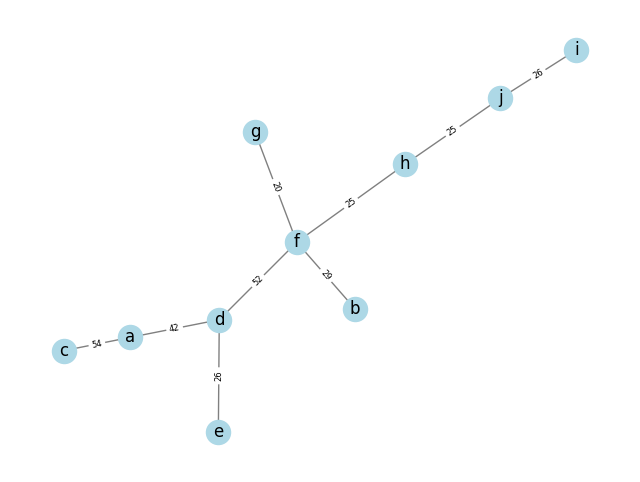

In [97]:
plot_graph(minimum_spanning_tree_toy1_instance, figsize=(8, 6))

In [118]:
minimum_spanning_tree_toy1_instance_dict = nx.to_dict_of_dicts(
    minimum_spanning_tree_toy1_instance
)


minimum_spanning_tree_toy1_instance_dict = {
    node1: {node2: subdict["weight"] for node2, subdict in nested_dict.items()}
    for node1, nested_dict in minimum_spanning_tree_toy1_instance_dict.items()
}

In [119]:
results_list = [
    "toy_1",
    minimum_spanning_tree_toy1_instance.number_of_nodes(),
    minimum_spanning_tree_toy1_instance.number_of_edges(),
    "Kruskal",
    total_cost,
    end_time - start_time,
    minimum_spanning_tree_toy1_instance_dict,
    "",
]



In [120]:
results.loc[len(results)] = results_list

In [121]:
results.query("instancia == 'toy_1' and algoritmo == 'Kruskal'").transpose()

,7
instancia,toy_1
n,10
m,9
algoritmo,Kruskal
custo,299.0
tempo,0.0
resultado,"{'f': {'g': 20, 'h': 25, 'b': 29, 'd': 52}, 'g..."
anteriores,


## New york

In [126]:
start_time = time.time()
minimum_spanning_tree, total_cost = kruskal(graph_ny)
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

Time between function executions: 10.429530143737793 seconds


In [149]:
minimum_spanning_tree_new_york = nx.Graph()

In [150]:
for u, v, weight in minimum_spanning_tree:
    minimum_spanning_tree_new_york.add_edge(u, v, weight=weight)

In [151]:
minimum_spanning_tree_new_york_dict = nx.to_dict_of_dicts(
    minimum_spanning_tree_new_york
)

minimum_spanning_tree_new_york_dict = {
    node1: {node2: subdict["weight"] for node2, subdict in nested_dict.items()}
    for node1, nested_dict in minimum_spanning_tree_new_york_dict.items()
}

In [155]:
results_list = [
    "new_york",
    minimum_spanning_tree_new_york.number_of_nodes(),
    minimum_spanning_tree_new_york.number_of_edges(),
    "Kruskal",
    total_cost,
    end_time - start_time,
    minimum_spanning_tree_new_york_dict,
    "",
]

results.loc[len(results)] = results_list

In [132]:
results.query("instancia == 'new_york' and algoritmo == 'Kruskal'").transpose()

,7
instancia,new_york
n,248089
m,264345
algoritmo,Kruskal
custo,219309549.0
tempo,10.42953
resultado,"{'64654': {'64665': 1.0, '64653': 538.0}, '646..."
anteriores,


## San Francisco

In [133]:
start_time = time.time()
minimum_spanning_tree, total_cost = kruskal(graph_sa)
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

In [134]:
minimum_spanning_tree_san = nx.Graph()

In [135]:
for u, v, weight in minimum_spanning_tree:
    minimum_spanning_tree_san.add_edge(u, v, weight=weight)

In [136]:
minimum_spanning_tree_san_dict = nx.to_dict_of_dicts(minimum_spanning_tree_san)


minimum_spanning_tree_san_dict = {
    node1: {node2: subdict["weight"] for node2, subdict in nested_dict.items()}
    for node1, nested_dict in minimum_spanning_tree_san_dict.items()
}

In [137]:
results_list = [
    "san_francisco",
    minimum_spanning_tree_san.number_of_nodes(),
    minimum_spanning_tree_san.number_of_edges(),
    "Kruskal",
    total_cost,
    end_time - start_time,
    minimum_spanning_tree_san_dict,
    "",
]

In [ ]:
results.loc[len(results)] = results_list

In [139]:
results.query("instancia == 'san_francisco' and algoritmo == 'Kruskal'").transpose()

,4
instancia,san_francisco
n,299036
m,321269
algoritmo,Kruskal
custo,303105738.0
tempo,2.882696
resultado,"{'120168': {'154033': 1.0}, '154033': {'120168..."
anteriores,NaN


## Colorado

In [148]:
start_time = time.time()
minimum_spanning_tree, total_cost = kruskal(graph_col)
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

Time between function executions: 4.780973 seconds


In [141]:
minimum_spanning_tree_colorado = nx.Graph()

In [142]:
for u, v, weight in minimum_spanning_tree:
    minimum_spanning_tree_colorado.add_edge(u, v, weight=weight)

In [143]:
minimum_spanning_tree_colorado_dict = nx.to_dict_of_dicts(
    minimum_spanning_tree_colorado
)


minimum_spanning_tree_colorado_dict = {
    node1: {node2: subdict["weight"] for node2, subdict in nested_dict.items()}
    for node1, nested_dict in minimum_spanning_tree_colorado_dict.items()
}

In [144]:
results_list = [
    "colorado",
    minimum_spanning_tree_colorado.number_of_nodes(),
    minimum_spanning_tree_colorado.number_of_edges(),
    "Kruskal",
    total_cost,
    end_time - start_time,
    minimum_spanning_tree_colorado_dict,
    "",
]

results.loc[len(results)] = results_list

In [145]:
results.query("instancia == 'colorado' and algoritmo == 'Kruskal'").transpose()

,5
instancia,colorado
n,410004
m,435665
algoritmo,Kruskal
custo,764446047.0
tempo,4.780973
resultado,"{'3626': {'14759': 1.0, '3624': 718.0, '3627':..."
anteriores,NaN


# Ford-Fulkerson

````python

Algoritmo de Ford-Fulkerson

Entrada: G = (V,A,f)
custo(a), para todo arco a de G
fluxo inicial dado ou nulo
Capacidade_Corte ← ∞
f0 ← 0 // quando se consideram inicialmente todos os fluxos como nulos

Construir Gf associado a G;

Enquanto existir caminho μst de s a t em Gf faça
    Determinar folga γst de μst em Gf
    // γst = mínimo das folgas dos arcos de μst
    Introduzir fluxo em μst em G igual a γst
    f0 ← f0 + γst
    Construir Gf

X ← s ∪ {vértices atingíveis a partir de s em Gf}
// vértices atingíveis a partir de s em Gf

Calcular Capacidade_Corte(X,V-X) em G
// f0 é o valor do fluxo máximo que passa por G e equivale ao valor de Capacidade_Corte(X,V-X) em G

Saída: f0

````


## Toy 2

In [226]:
source = "1"
terminal = "6"
start_time = time.time()
max_flow = ford_fulkerson(toy2_instance, source, terminal)
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

Time between function executions: 0.0009791851043701172 seconds


In [228]:
results_list = [
    "toy_2",
    graph_toy2_instance.number_of_nodes(),
    graph_toy2_instance.number_of_edges(),
    "Ford-Fulkerson",
    max_flow,
    end_time - start_time,
    "",
    "",
]

results.loc[len(results)] = results_list

In [229]:
results.query("instancia == 'toy_2' and algoritmo == 'Ford-Fulkerson'").transpose()

,8
instancia,toy_2
n,6
m,9
algoritmo,Ford-Fulkerson
custo,6.0
tempo,0.000979
resultado,
anteriores,


## DIMACS

In [230]:
dimacs_instance

{'1': {'2': 5.0, '3': 15.0},
 '2': {'4': 5.0, '5': 5.0},
 '3': {'4': 5.0, '5': 5.0},
 '4': {'6': 15.0},
 '5': {'6': 5.0},
 '6': {}}

In [231]:

source = "1"
terminal = "6"
start_time = time.time()
max_flow = ford_fulkerson(dimacs_instance, source, terminal)
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

Time between function executions: 0.0 seconds


In [232]:
max_flow

15.0

In [233]:
results_list = [
    "dimacs",
    graph_dimacs_instance.number_of_nodes(),
    graph_dimacs_instance.number_of_edges(),
    "Ford-Fulkerson",
    max_flow,
    end_time - start_time,
    "",
    "",
]

results.loc[len(results)] = results_list

In [234]:
results.query("instancia == 'dimacs' and algoritmo == 'Ford-Fulkerson'").transpose()

,9
instancia,dimacs
n,6
m,8
algoritmo,Ford-Fulkerson
custo,15.0
tempo,0.0
resultado,
anteriores,


In [235]:
results

,instancia,n,m,algoritmo,custo,tempo,resultado,anteriores
0,toy1,10,19,Dijkstra,8.160000e+02,0.000098,"{'a': 0, 'b': 60, 'c': 54, 'd': 42, 'e': 68, '...","{'a': None, 'b': 'a', 'c': 'a', 'd': 'a', 'e':..."
1,new_york,264346,365050,Dijkstra,1.866866e+11,6347.335877,"{1: 0.0, 2: 803.0, 3: 50999.0, 4: 50841.0, 5: ...","{1: nan, 2: 1.0, 3: 4.0, 4: 3926.0, 5: 1219.0,..."
2,san_francisco,321270,397415,Dijkstra,2.956294e+11,10948.876281,"{1: 0.0, 2: 1988.0, 3: 11311.0, 4: 12376.0, 5:...","{1: nan, 2: 1.0, 3: 309.0, 4: 3.0, 5: 4.0, 6: ..."
3,colorado,435666,521200,Dijkstra,1.104877e+12,25955.031884,"{1: 0.0, 2: 12406.0, 3: 118963.0, 4: 120045.0,...","{1: nan, 2: 1.0, 3: 5.0, 4: 3.0, 5: 57.0, 6: 7..."
4,san_francisco,299036,321269,Kruskal,3.031057e+08,2.882696,"{'120168': {'154033': 1.0}, '154033': {'120168...",NaN
5,colorado,410004,435665,Kruskal,7.644460e+08,4.780973,"{'3626': {'14759': 1.0, '3624': 718.0, '3627':...",NaN
6,toy_1,10,9,Kruskal,2.990000e+02,0.000000,"{'f': {'g': 20, 'h': 25, 'b': 29, 'd': 52}, 'g...",
7,new_york,248089,264345,Kruskal,2.193095e+08,3.569421,"{'64654': {'64665': 1.0, '64653': 538.0}, '646...",
8,toy_2,6,9,Ford-Fulkerson,6.000000e+00,0.000979,,
9,dimacs,6,8,Ford-Fulkerson,1.500000e+01,0.000000,,


In [236]:
results.to_csv("data/results.csv", index=False)